<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_4/Assignment_4_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classifier with various training knobs with numpy

# Implementation Details and Discussion

* Here, I have used MNIST dataset to implement MNIST classifier with various training knobs with numpy
* I have followed all the details mentioned in the **steps** section below.
* First I tried 100 epochs, but result was very bad for that. I did some other hyperparameter tuning inclusing changing batch size also.
* Finally, after 50 epochs the result is:
> Epoch:45 | Test-Err:0.140 | Test-Acc:0.9069 | Train-Err:0.207 | Train-Acc:0.8602833333333333 | 

## Steps:  
Following steps have been followed and implemented in this colab using Numpy
* a. Mini-Batch Gradient Descent 
* b. Appropriate/Adaptive Learning Rate
* c. Dropout Regularization Layer
* d. Appropriate Weight Initialization
* e. Image Augmentation
* f. Tuning of Number of Neurons and Layers [3 or more layers]
* g. ReLU Activation Layer
* h. Normalization before training (scaling the input)
* i. Visualization, Validation, Confusion Matrix to show common errors

# Check if GPU/TPU available

In [1]:
!nvidia-smi

Wed Apr  7 20:04:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Colab environment

In [2]:
!python --version

Python 3.7.10


In [3]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.29.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


# Library

In [1]:
import sys,numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# Load MNIST Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # loading the mnist dataset


11493376/11490434 [==============================] - 0s 0us/step


# Normalizing and Reshaping Data

In [3]:
x_train=x_train/255 # normalizing the x_train and x_test dataset
x_test=x_test/255

#Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,28,28,1) # inorder to preprocess the data, reshaping into rank 4 matrix 
x_test = x_test.reshape(-1,28,28,1)
print(x_test.shape)

(10000, 28, 28, 1)


# Data Augmentation

In [4]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Model Fitting


In [5]:
datagen.fit(x_train,augment=True) # fitting the model

# Reshaping Image

In [6]:
images = x_train.reshape(len(x_train),28*28) # reshaping x_train to pass to model
x_test=x_test.reshape(len(x_test),28*28)# reshaping x_test to pass to model

labels = np_utils.to_categorical(y_train) # convert to one hot vectors
y_test = np_utils.to_categorical(y_test)

# Plot Training Image

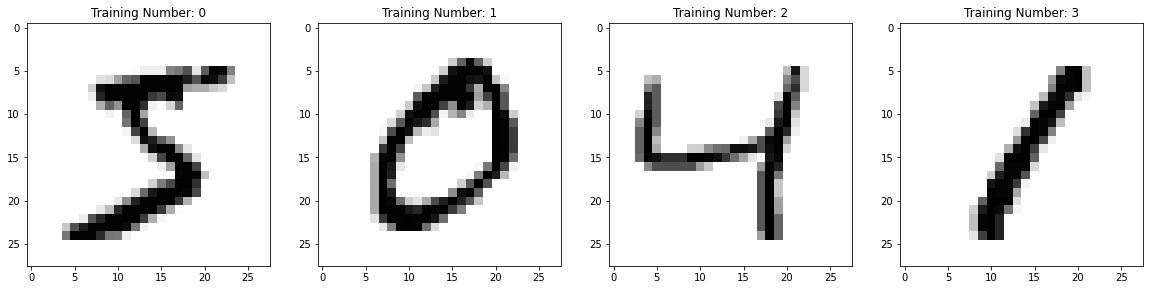

In [7]:
X_train__ = x_train.reshape(x_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for j, ax in enumerate(axis.flat):
    ax.imshow(X_train__[j], cmap='binary')
    digit = y_train[j].argmax()
    ax.set(title = f"Training Number: {j}");

# Relu Activation


In [8]:
np.random.seed(1)
# Activation functions and their derivatives
def tanh(x):
    return np.tanh(x)

def tanhderiv(output):
    return 1 - (output ** 2)

def relu(x):
  return (x >= 0) * x # returns x if x > 0

def relud(output):
  return output >= 0 # returns 1 for input > 0

def softmax(x):
  temp = np.exp(x)
  return temp / np.sum(temp, axis=1, keepdims=True)

# Tuning and Training 

In [28]:
Test_Accuracy=[]
Training_Accuracy=[]
Training_Error=[]
Test_Error=[]
lr_rate=.009 # Learning rate
batch_size=100 # batch size 
epochs=50 # number of iterations


## 4 Layer NN

In [29]:
# NN with 4 layer 
pixels_per_image, hidden_size1,hidden_size2,hidden_size3,output  = (784,450,128,64,10) # specifying input, hidde layers and output layer neurons

## Initializing Weights

In [30]:
# random initialization of weights for each layer
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size1)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size1,hidden_size2)) - 0.1
weights_2_3 = 0.2*np.random.random((hidden_size2,hidden_size3)) - 0.1
weights_3_4 = 0.2*np.random.random((hidden_size3,output)) - 0.1

## Training

In [31]:
for j in range(epochs):
    error, correct_cnt = (0.0, 0)
 
  # forward propagation step

    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        layer_0 = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask1 = np.random.randint(2,size=layer_1.shape) 
        layer_1 *= dropout_mask1 * 2 # dropout mask with 50 percent neurons active during training
        layer_2 = tanh(np.dot(layer_1,weights_1_2))
        dropout_mask2 = np.random.randint(2,size=layer_2.shape)
        layer_2 *= dropout_mask2 * 1.5
        layer_3=tanh(np.dot(layer_2,weights_2_3))
        layer_4 = softmax(np.dot(layer_3,weights_3_4))
          #print(layer_2)

        error += np.sum((labels[batch_start:batch_end] - layer_4) ** 2) #  mse per batch 
          #print(error)
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_4[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1])) # counting how many prediction labels match with the true labels
  
  # back propagation step

        layer_4_delta = (labels[batch_start:batch_end]-layer_4)/batch_size
        layer_3_delta = layer_4_delta.dot(weights_3_4.T)* tanhderiv(layer_3)
        layer_2_delta = layer_3_delta.dot(weights_2_3.T)* tanhderiv(layer_2)
        layer_2_delta  *= dropout_mask2
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relud(layer_1)
        layer_1_delta *= dropout_mask1

  # updating weights at each layer during back propagation
        weights_3_4 += lr_rate * layer_3.T.dot(layer_4_delta)
        weights_2_3 += lr_rate * layer_2.T.dot(layer_3_delta)
        weights_1_2 += lr_rate * layer_1.T.dot(layer_2_delta)
        weights_0_1 += lr_rate * layer_0.T.dot(layer_1_delta)
                  
    
    test_correct_count = 0
    test_err=0.0

  # testing the images and predicting the labels
    y_pred=[]
    actual_label=[]
    for i in range(len(x_test)):
      layer_0 = x_test[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = tanh(np.dot(layer_1,weights_1_2))
      layer_3= tanh(np.dot(layer_2,weights_2_3))
      layer_4 = softmax(np.dot(layer_3, weights_3_4))
      
     
      y_pred+=[int(np.argmax(layer_4))]

      actual_label+=[np.argmax(y_test[i:i+1])]
      test_err += np.sum((y_test[i:i+1] - layer_4) ** 2)
      test_correct_count += int(np.argmax(layer_4) == np.argmax(y_test[i:i+1])) # count how many test data predicted labels match with true labels

      
    
    if(j%5==0):
      Test_Error.append(test_err/ float(len(x_test)))
      Test_Accuracy.append(test_correct_count/ float(len(x_test)))
      Training_Error.append(error/ float(len(images)))
      Training_Accuracy.append(correct_cnt/ float(len(images)))
      sys.stdout.write("\n" + \
                          "Epoch:" + str(j) + \
                          " | Test-Err:" + str(test_err/ float(len(x_test)))[0:5] +\
                          " | Test-Acc:" + str(test_correct_count/ float(len(x_test)))+\
                          " | Train-Err:" + str(error/ float(len(images)))[0:5] +\
                          " | Train-Acc:" + str(correct_cnt/ float(len(images))) +\
                          " | ")


Epoch:0 | Test-Err:0.807 | Test-Acc:0.5471 | Train-Err:0.881 | Train-Acc:0.24735 | 
Epoch:5 | Test-Err:0.222 | Test-Acc:0.8619 | Train-Err:0.340 | Train-Acc:0.7806333333333333 | 
Epoch:10 | Test-Err:0.168 | Test-Acc:0.8947 | Train-Err:0.255 | Train-Acc:0.8349833333333333 | 
Epoch:15 | Test-Err:0.154 | Test-Acc:0.9021 | Train-Err:0.229 | Train-Acc:0.85115 | 
Epoch:20 | Test-Err:0.146 | Test-Acc:0.9036 | Train-Err:0.215 | Train-Acc:0.8596166666666667 | 
Epoch:25 | Test-Err:0.144 | Test-Acc:0.9036 | Train-Err:0.209 | Train-Acc:0.8622666666666666 | 
Epoch:30 | Test-Err:0.143 | Test-Acc:0.9053 | Train-Err:0.207 | Train-Acc:0.8631833333333333 | 
Epoch:35 | Test-Err:0.141 | Test-Acc:0.908 | Train-Err:0.204 | Train-Acc:0.8644 | 
Epoch:40 | Test-Err:0.140 | Test-Acc:0.9086 | Train-Err:0.203 | Train-Acc:0.8639333333333333 | 
Epoch:45 | Test-Err:0.140 | Test-Acc:0.9069 | Train-Err:0.207 | Train-Acc:0.8602833333333333 | 

# Confusion Matrix

In [32]:
import itertools
"""
    function to print and plot confusion matrix
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

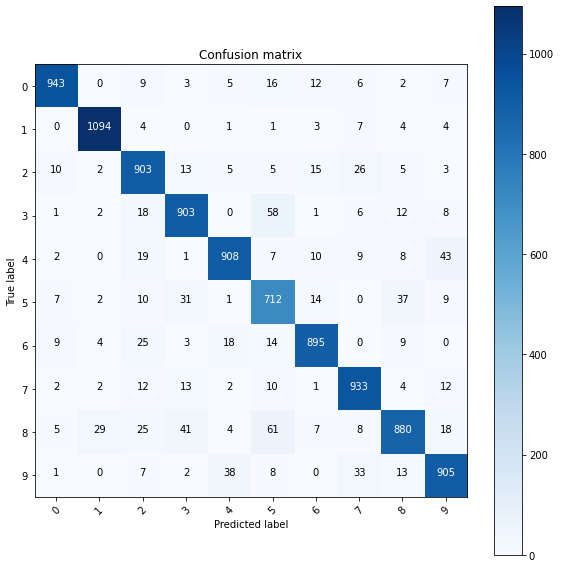

In [33]:
# compute the confusion matrix
conf_mtx = confusion_matrix(y_pred, actual_label)
# plot the confusion matrix
fig = plt.figure(figsize=(8, 8))
plot_confusion_matrix(conf_mtx, classes = range(10))

# Visualization

## Plot: Training vs. Testing Accuracy

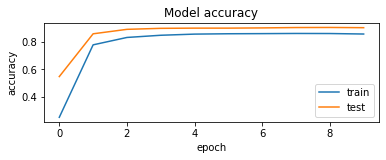

In [34]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(Training_Accuracy)
plt.plot(Test_Accuracy)
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

## PLot: Training vs. Test Loss


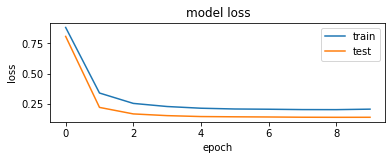

In [35]:
plt.subplot(2,1,2)
plt.plot(Training_Error)
plt.plot(Test_Error)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# Display Common Errors

In [36]:
# Errors are difference between predicted labels and true labels
y_pred = np.array(y_pred) #converting it to numpy array
actual_label = np.array(actual_label)#converting it to numpy array
error = (y_pred - actual_label != 0)# check for errors i.e. y_pred doesnt match with actual_labels 

y_pred_err = y_pred[error]
actual_label_err = actual_label[error]
x_val_err = x_test[error]

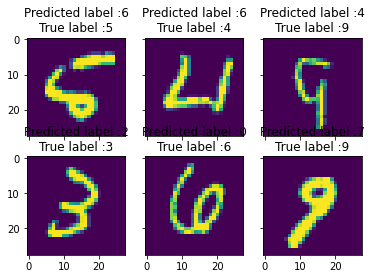

In [37]:
#Function to display common errors
def display_errors(img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    index = 0
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            ax[row,col].imshow((img_errors[index]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[index],obs_errors[index]))
            n += 1
            index+=1

# Show errors
display_errors(x_val_err, y_pred_err, actual_label_err)